In [1]:
import datetime
import time
import requests
import json
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Carga de Datos

In [19]:
# Definir la variable coin
coin = 'cardano'

# Definir la ruta del archivo CSV según la variable coin
csv_path = f'../csv/{coin}.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_path)

# Mostrar las primeras filas del DataFrame para verificar la carga exitosa
print(df.head())

     Market Cap     Price        Volume        Date
0  6.960214e+08  0.026845  2.351678e+06  2017-10-18
1  6.956220e+08  0.026830  2.815156e+06  2017-10-19
2  7.855800e+08  0.030300  8.883473e+06  2017-10-20
3  7.412021e+08  0.028588  5.308857e+06  2017-10-21
4  7.206698e+08  0.027796  2.901876e+06  2017-10-22


# Información básica del DataFrame

In [21]:
# Información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Market Cap  2136 non-null   float64
 1   Price       2136 non-null   float64
 2   Volume      2136 non-null   float64
 3   Date        2136 non-null   object 
dtypes: float64(3), object(1)
memory usage: 66.9+ KB
None


No se observan valores nulos u otros datos inconsistentes y los valores atipicos aportan informacion valiosa al EDA. Se puede uilizar el Data Frame sin necesidad de otros tratamientos iniciales.

# Estadísticas resumidas

In [5]:
print(df.describe())

         Market Cap        Price        Volume
count  2.136000e+03  2136.000000  2.136000e+03
mean   1.503767e+10     0.469787  9.561607e+08
std    1.893493e+10     0.589978  1.771004e+09
min    5.527801e+08     0.021321  1.729975e+06
25%    2.236077e+09     0.071873  1.060782e+08
50%    6.775615e+09     0.251386  2.834988e+08
75%    1.700409e+10     0.516290  8.445267e+08
max    9.500373e+10     2.967075  1.743601e+10



El precio es volátil, su desviación estándar mayor que su media, el precio de Cardano ha cambiado en gran medida en cortos períodos de tiempo, el precio máximo fue muy alto en comparación.

La capitalización de mercado es volátil, su desviación estándar es mayor que su media.

El volumen es muy volátil, mas que precio y capitalización de mercado, su desviación estándar es casi el doble que su media.

Estas observaciones iniciales indican que Cardano podría considerarse como muy volátil en comparación con activos financieros tradicionales.
En general, las estadísticas dadas indican que Cardano es una criptomoneda muy volátil con un amplio rango de precios 

# Histograma de Precios

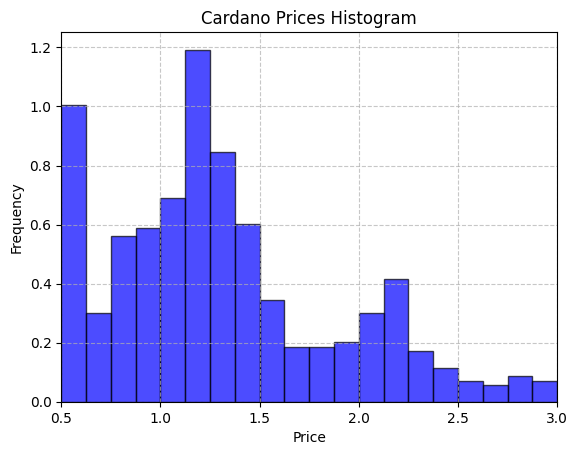

In [7]:
# Crear el histograma
plt.hist(df['Price'], bins=20, range=(0.5, 3), color='blue', edgecolor='black', density=True, alpha=0.7)

# Configurar límites del eje X
plt.xlim(0.5, 3)

# Configurar etiquetas y título
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title(f'{coin.capitalize()} Prices Histogram')

# Mostrar la trama
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Una observación preliminar de los precios, sugiere aproximarse a una distribución de datos normal, en la que la mayoría de los valores tienden a agruparse fuertemente alrededor de los valores de precios mas frecuentes.

# Gráficos de dispersión (scatter plot)

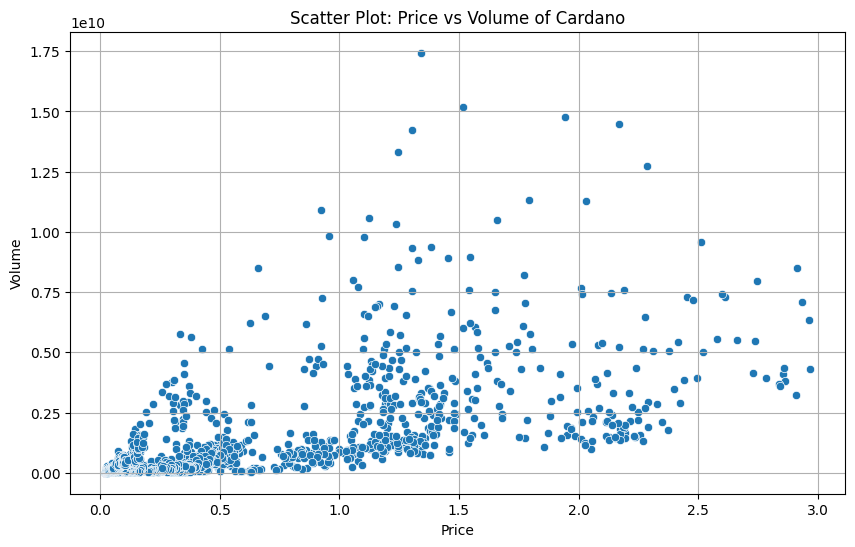

In [8]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Volume')
plt.title(f'Scatter Plot: Price vs Volume of {coin.capitalize()}')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

No se observan muchos puntos que se desvíen significativamente de la tendencia general en los precios mas frecuentes, aa precios aaltos estos puntos podrían representar eventos excepcionales que causaron un volumen inusual en relación con el precio.
El volumen tiende a aumentar cuando el precio sube, esto puede entenderse como una mayor actividad comercial cuando el precio es alcista.

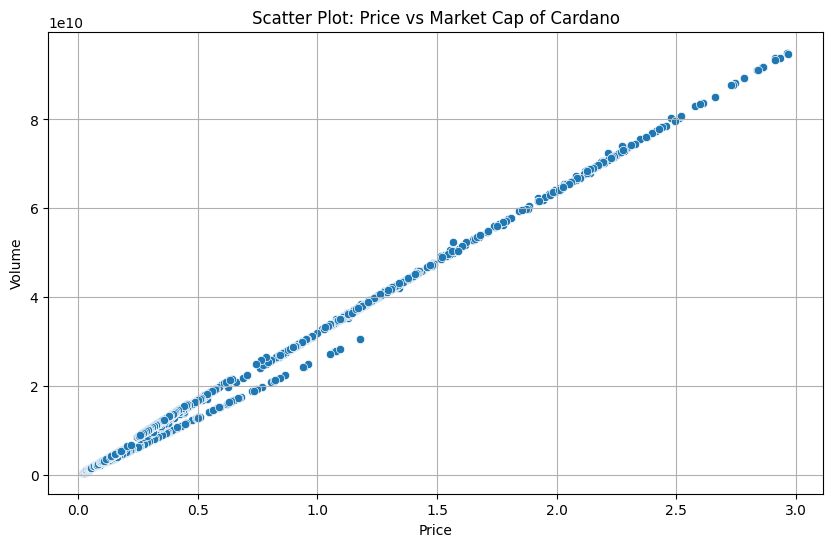

In [9]:
# Grafica de dispersión (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Market Cap')
plt.title(f'Scatter Plot: Price vs Market Cap of {coin.capitalize()}')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [11]:
# Calcular y mostrar la matriz de correlación
correlation_matrix = df[['Price', 'Market Cap']].corr()
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
               Price  Market Cap
Price       1.000000    0.998852
Market Cap  0.998852    1.000000


La capitalización de mercado es el precio multiplicado por la cantidad de que está en circulación. Por lo tanto, la capitalización de mercado también está determinada por la oferta y la demanda que determina el precio, de ahi esta alta correlación con el precio.

Líneas de tendencia en el gráfico con diferente pendiente demuestran muy alta volatilidad.

# Gráficos de caja y bigotes (box plot)

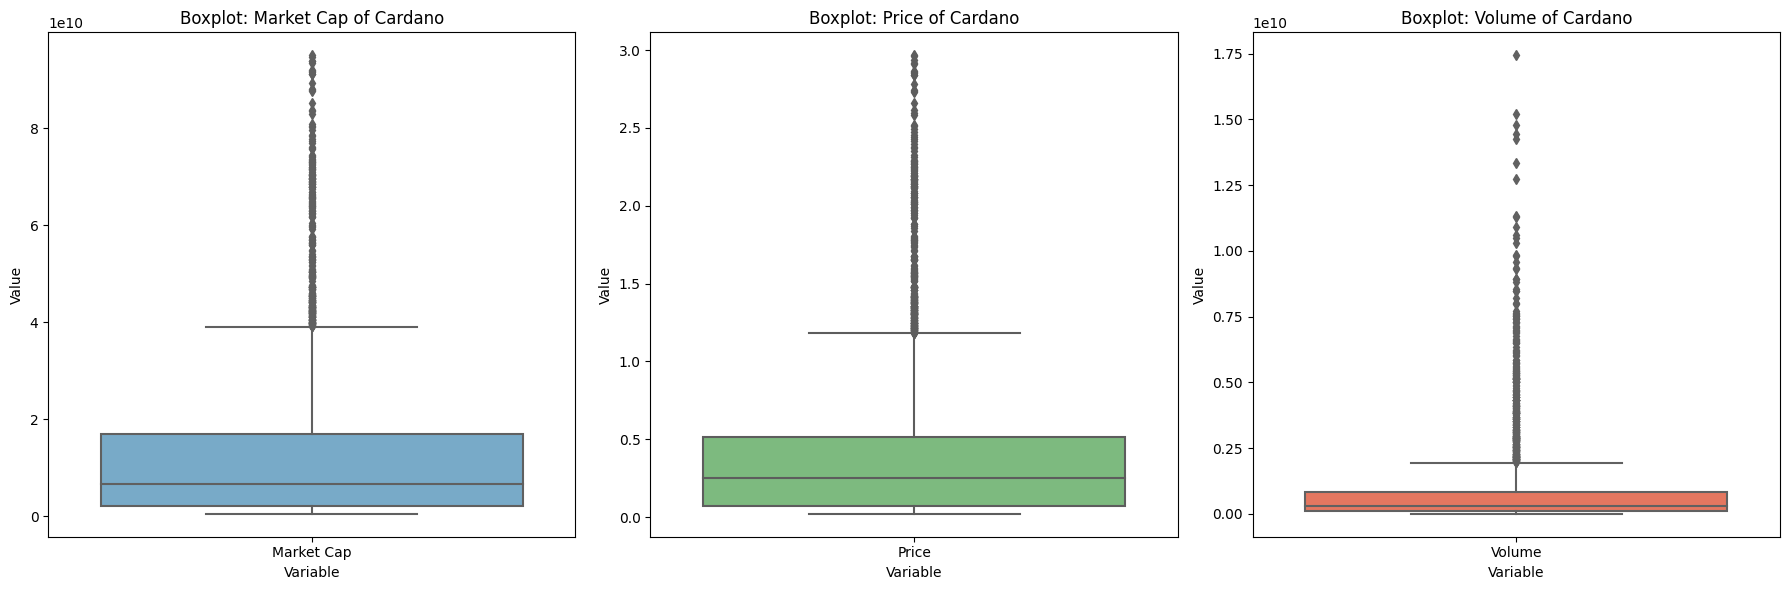

In [12]:
# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Paletas predefinidas
palette = ['Blues', 'Greens', 'Reds']

# Boxplot de Market Cap
sns.boxplot(data=df[['Market Cap']], ax=axes[0], palette=palette[0])
axes[0].set_title(f'Boxplot: Market Cap of {coin.capitalize()}')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Value')

# Boxplot de Price
sns.boxplot(data=df[['Price']], ax=axes[1], palette=palette[1])
axes[1].set_title(f'Boxplot: Price of {coin.capitalize()}')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Value')

# Boxplot de Volume
sns.boxplot(data=df[['Volume']], ax=axes[2], palette=palette[2])
axes[2].set_title(f'Boxplot: Volume of {coin.capitalize()}')
axes[2].set_xlabel('Variable')
axes[2].set_ylabel('Value')

# Ajustar la disposición de los subplots y mostrar la figura
plt.tight_layout()
plt.show()

Se observa parte de los datos muy concentrados, los limites de las cajas (que representa la mitad central de los datos) se encuetran en valores cercanos de la escala.
El valor máximo es mucho más alto que la mediana, lo que sugiere que hay algunas transacciones muy grandes, estas transacciones contribuirían al alza del activo y la variabilidad de la capitalizacion 
El IQR es grande, lo que implica dispersion en los datos.

Valores atípicos pueden deberse a factores externos.
La altura comparativa de la mediana de volumen indicaría que es menos volátil, capitalización de mercado y precio seria el orden, estas dos últimas, bastante mas volátiles que el volumen. 
En general, el boxplot sugiere que Cardano es un activo volátil con una distribución muy concentrada.

In [14]:
# Convertir las columnas a numpy arrays numéricos
price_values = df['Price'].values
volume_values = df['Volume'].values
market_cap_values = df['Market Cap'].values

# Cálculos del Box-Whisker Ratio (BWR)
bwr_values = []

for values, column in zip([price_values, volume_values, market_cap_values], df.columns[1:]):
    values = values[~np.isnan(values)]  # Eliminar valores no válidos
    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    iwr = upper_whisker - lower_whisker
    if iwr != 0:  # Evitar división por cero
        bwr = iqr / iwr
        bwr_values.append(bwr)

# Imprimir los resultados del Box-Whisker Ratio (BWR)
for i, column in enumerate(df.columns[1:]):
    print(f"Box-Whisker Ratio (BWR) for {column}: {bwr_values[i]:.2f}")

# Cálculos de la Relative Median Height
median_height_values = []

for values in [price_values, volume_values, market_cap_values]:
    values = values[~np.isnan(values)]  # Eliminar valores no válidos
    median_height = np.median(values) / values.max()
    median_height_values.append(median_height)

# Imprimir los resultados de la Relative Median Height
for i, column in enumerate(df.columns[1:]):
    print(f"Relative Median Height (RMH))for {column}: {median_height_values[i]:.2f}")


Box-Whisker Ratio (BWR) for Price: 0.25
Box-Whisker Ratio (BWR) for Volume: 0.25
Box-Whisker Ratio (BWR) for Date: 0.25
Relative Median Height (RMH))for Price: 0.08
Relative Median Height (RMH))for Volume: 0.02
Relative Median Height (RMH))for Date: 0.07



Los valores obtenidos para BWR y RMH son consistentes con las observaciones realizadas a partir de los boxplots.  

# Gráficos de Evolución Temporal (line plot)

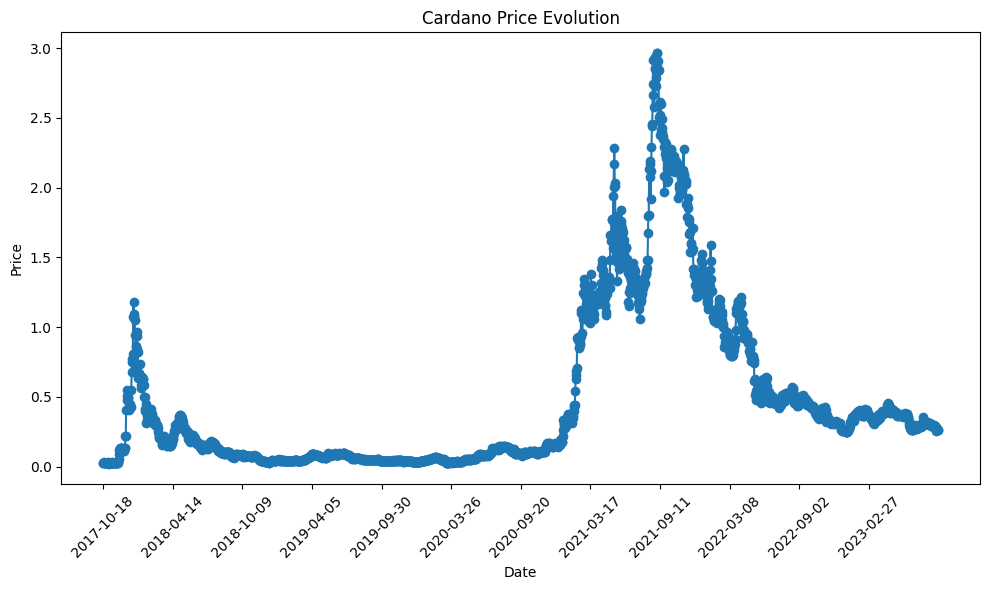

In [15]:
# Graficar la evolución del precio vs fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{coin.capitalize()} Price Evolution')

# Obtener índices para mostrar 12 fechas equidistantes
step = len(df) // 12
x_labels = df['Date'][::step]
plt.xticks(x_labels, rotation=45)

plt.tight_layout()
plt.show()

La evolución del precio de Cardano desde su inicio ha sido muy volátil. El precio de ADA se disparó desde su lanzamiento en septiembre de 2021 hasta alcanzar un máximo histórico de 3,10 dólares en noviembre de 2021. Sin embargo, el precio ha disminuido desde entonces, y actualmente se cotiza a alrededor de 0,25-0,30 dólares.


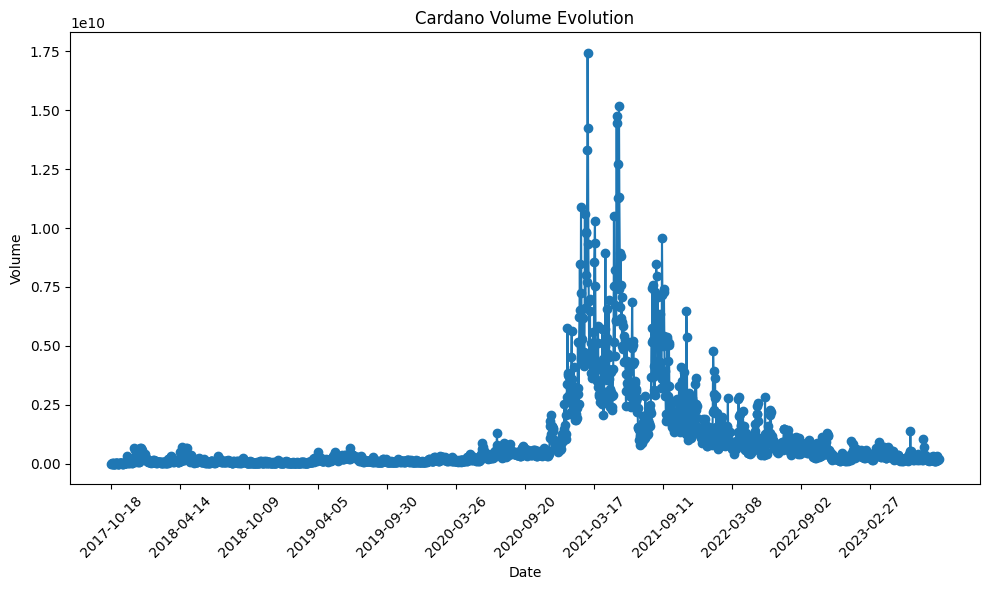

In [16]:
# Graficar la evolución del volumen vs fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], marker='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title(f'{coin.capitalize()} Volume Evolution')

# Obtener índices para mostrar 12 fechas equidistantes
step = len(df) // 12
x_labels = df['Date'][::step]
plt.xticks(x_labels, rotation=45)

# Guardar la gráfica en un archivo PNG
plt.savefig(f'png/{coin.capitalize()}_Volume_Evolution.png')

plt.tight_layout()
plt.show()

La evolución del volumen de Cardano desde su inicio ha sido similar a la del precio. El volumen se ha disparado desde el lanzamiento de Cardano en septiembre de 2021, y alcanzó un máximo histórico de 27.000 millones de dólares en noviembre de 2021. Sin embargo, el volumen ha disminuido desde entonces, y actualmente se sitúa en torno a los 1.000 millones de dólares.

In [18]:
# Ejemplo de una serie de valores
data = df['Price']

# Calcula la media y la desviación estándar
mean = np.mean(data)
std = np.std(data)

# Calcula el coeficiente de curtosis
kurtosis = np.sum((np.array(data) - mean) ** 4) / (len(data) * std ** 4)

print("Coeficiente de Curtosis:", kurtosis)


Coeficiente de Curtosis: 5.8308021351181365


Este coeficiente mayor de 3 indica que hay una mayor probabilidad de observar valores atípicos o extremos en la distribución de los precios en comparación con lo que sería esperado bajo una distribución normal.

# Conclusiones Preliminares para Cardano

Los distintos gráficos, cálculos y métricas evaluadas resultan consistentes, haciendo entendible el comportamiento histórico de esta criptomoneda.     

El precio diario ha mostrado una distribución leptocúrtica(Coeficiente de Curtosis > 3), en el ambito de las criptomonedas explican esta distribución partir de su volatilidad de mercado en comparación con otros activos financieros. La volatilidad del mercado implica que el precio puede cambiar mucho en un corto período de tiempo. 

El volumen es una medida de la cantidad que se negocia en un período de tiempo determinado, los especialistas explican la baja liquidez en que no hay muchos compradores y vendedores en comparacion con otros activos financieros u otras criptomonedas.

Se considera tambien que la menor regulación de criptomonedas en comparación con otros activos financieros puede explicar un comportamiento más especulativo, contribuyendo a aumentar la volatilidad del mercado.

Los inversores más reacios al riesgo pueden preferir activos y mercados con distribuciones platicúrticas porque es menos probable que esos activos produzcan resultados extremos. 

La volatilidad puede deberse a que como todo proyecto sea nuevo, aún no haya desarrollado una base de inversores sólida o algunas posiciones tomadas por grandes inversores lo hacen más propenso a fluctuar.

# Cardano es un activo financiero con potencial de ganancias y pérdidas significativas. 

En caso de superar esta etapa de evaluacion preliminar, se recomienda un detallado análisis técnico, fundamental y de sentimiento para Cardano.